**Importing the Dependencies**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras datasets

In [20]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [21]:
type(X_train)


numpy.ndarray

In [22]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape,X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 images

Test data = 10,000 images

 Image dimension > 28 x 28

 Grayscale Image > 1 channel

In [23]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [24]:
print(X_train[10].shape)

(28, 28)


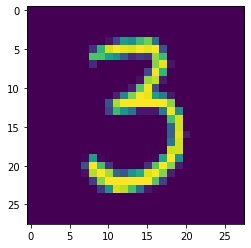

3


In [25]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[50])


Image Labels

In [26]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [27]:
# unique values in Y_train

print(np.unique(Y_train))


# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset,if not, we have to resize all the images to  a common dimension

In [28]:
# scaling the values
X_train = X_train/255
X_test = X_test/255

In [29]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [30]:
# setting up layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [33]:
# compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# training the neural network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0323 - accuracy: 0.9895
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9908
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9939
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0181 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

The training data accuracy = 98.9%

Accuracy on Test data


In [37]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1321 - accuracy: 0.9724
0.9724000096321106


Test data accuracy = 97.2%

In [38]:
print(X_test.shape)

(10000, 28, 28)


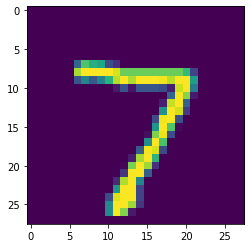

In [39]:
# first data point in x_test
plt.imshow(X_test[0])
plt.show()

In [40]:
print(Y_test[0])

7


In [41]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [42]:
print(Y_pred.shape)

(10000, 10)


In [43]:
print(Y_pred[0])

[8.6444896e-05 9.4640106e-01 1.2681906e-01 4.8136041e-01 1.2292700e-06
 1.3369566e-07 3.8583024e-15 1.0000000e+00 1.3529268e-05 6.6395634e-01]


model.predict() gives the prediction probability of each class for that data point

In [45]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [46]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels )


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test > True Labels

Y_pred_labels > Predicted Labels

Confusion matrix

In [49]:
conf_mat = confusion_matrix(Y_test,Y_pred_labels)

In [50]:
print(conf_mat)

tf.Tensor(
[[ 971    1    0    0    0    2    3    1    2    0]
 [   0 1120    1    3    0    2    3    1    4    1]
 [   3    6  994    2    4    0    2   11    9    1]
 [   0    0    5  972    0   13    0    5    8    7]
 [   1    1    4    1  961    0    7    2    0    5]
 [   2    1    0   14    2  864    4    2    3    0]
 [   4    3    0    2    3    8  934    0    4    0]
 [   2    3    6    2    1    1    0 1002    3    8]
 [   4    1    4    3    4    7    4    2  942    3]
 [   2    5    0    7   19    9    1    9    8  949]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

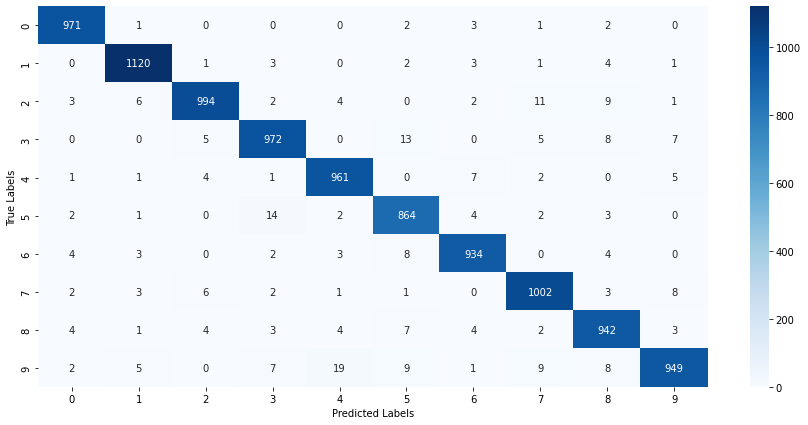

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')